In [1]:
import cv2
import matplotlib.pyplot as plt
from immas import MammogramImage , preprocessing , segmentation
from immas.io import read_dataset
from immas.basic_functions import show_image_plt
from immas import preprocessing

#Openkernel , Openkernel1 and Openkernel2 are tuples
def Segmentation(img, OpenKernel=(10,10), CloseKernel=(10,10)):
    img = segmentation.multithresholding(img)
    img = segmentation.thresh_to_binary(img)
    img1 = preprocessing.open(img,OpenKernel)
    img2 = preprocessing.close(img1,CloseKernel)
    return (img1,img2)

#mean 1&2 are numbers
def Segmentation2(img, mean1=30,mean2=30, OpenKerne2=(20,20)):
    img = segmentation.mean_shift(img,mean1,mean2)
    img = segmentation.multithresholding(img)
    img = segmentation.thresh_to_binary(img)
    img = preprocessing.open(img,OpenKerne2)
    return img

from immas import preprocessing

def testPreProcessing (img, MorphoKernel = 20, ClaheKernel = 10.0, OpenKernel=(5,5)):
    #img = preprocessing.resize(img, 0.5, 0.5)
    #img = preprocessing.close(img)
    #img = preprocessing.dilate(img)
    #img = preprocessing.clahe(img,10.0)
    img = preprocessing.open(img,OpenKernel)
    img = preprocessing.morphoEnhancement(img,MorphoKernel, ClaheKernel)
    img = preprocessing.waveletTransform(img)
    #img = preprocessing.erode(img,(3,3))    
    return img

In [2]:
def Plot_Result(img, Morpho_kernel_size, Morpho_clahe_kernel, PreOpenKernel, OpenKernel, CloseKernel):

    av_jaccard1 = 0
    av_jaccard2 = 0
    for m in img:
        m.read_data()
        #m.image_data = testPreProcessing(m.image_data, Morpho_kernel_size, Morpho_clahe_kernel, PreOpenKernel )
        m.image_data = preprocessing.fullPreprocessing(m.image_data)

        #segment using both methods
        #result1, result2 = Segmentation(m.image_data, OpenKernel, CloseKernel)
        result1 = segmentation.fullSegmentation(m.image_data)
        #result3 = Segmentation2(m.image_data, mean1,mean2, Openkernel2)

        #show both results
        plt.figure(figsize=(20, 40))
        plt.subplot(1,3,1)
        plt.axis("off")
        plt.imshow(m.cropped_ground_truth, interpolation="nearest", cmap=plt.cm.gray)
        plt.title('Groundtruth')

        plt.subplot(1,3,2)
        plt.axis("off")
        plt.imshow(m.image_data, interpolation="nearest", cmap=plt.cm.gray)
        plt.title('PreProcessed')

        plt.subplot(1,3,3)
        plt.axis("off")
        plt.imshow(result1, interpolation="nearest", cmap=plt.cm.gray)   
        plt.title('Segmentation')
        
        #plt.subplot(1,4,4)
        #plt.axis("off")
        #plt.imshow(result2, interpolation="nearest", cmap=plt.cm.gray)          
        #plt.title('Segmentation2')
        jac1 = segmentation.jaccard_index(result1,  m.cropped_ground_truth)
        print(jac1)
        plt.show() 
        #jac2 = segmentation.jaccard_index(result2,  m.cropped_ground_truth)
        av_jaccard1 = av_jaccard1 + jac1
        #av_jaccard2 = av_jaccard2 + jac2
    return av_jaccard1/len(img)

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 107, number of images for testing is 0


C:\ProgramData\Anaconda3\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars


0.2932825604588938


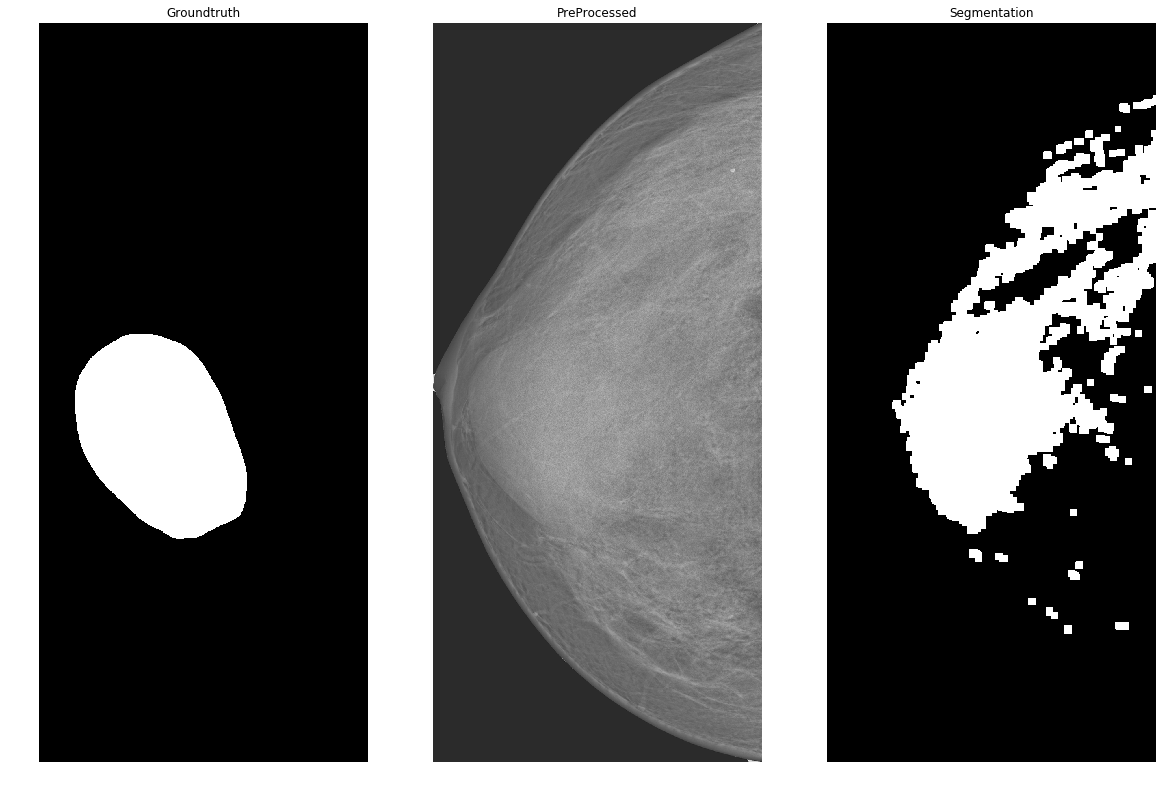

0.8741985982370785


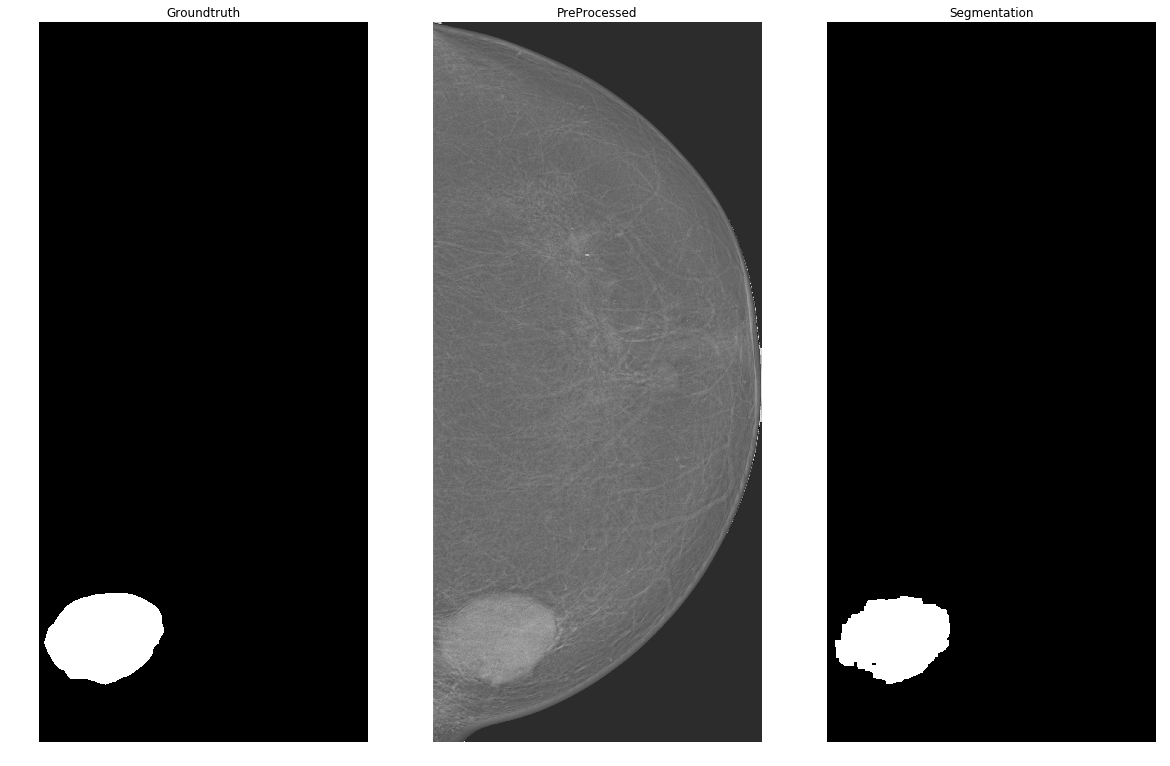

0.14225460122699388


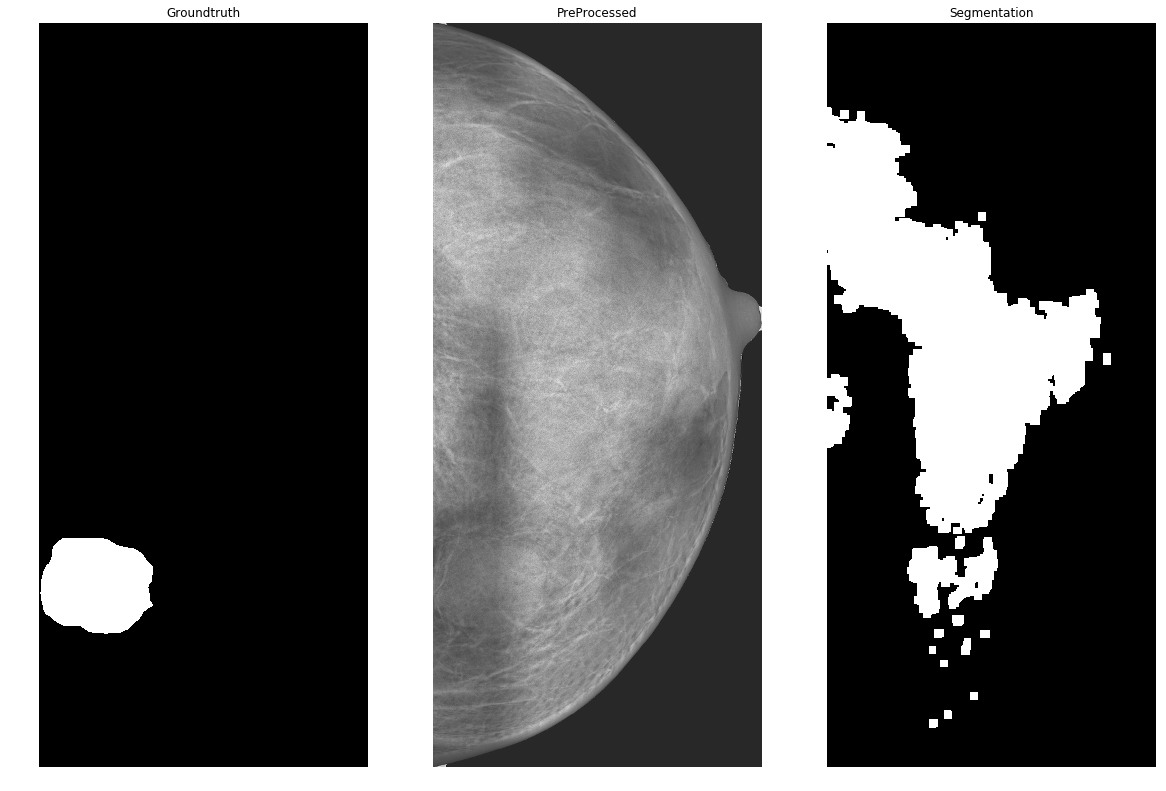

0.5250018912171874


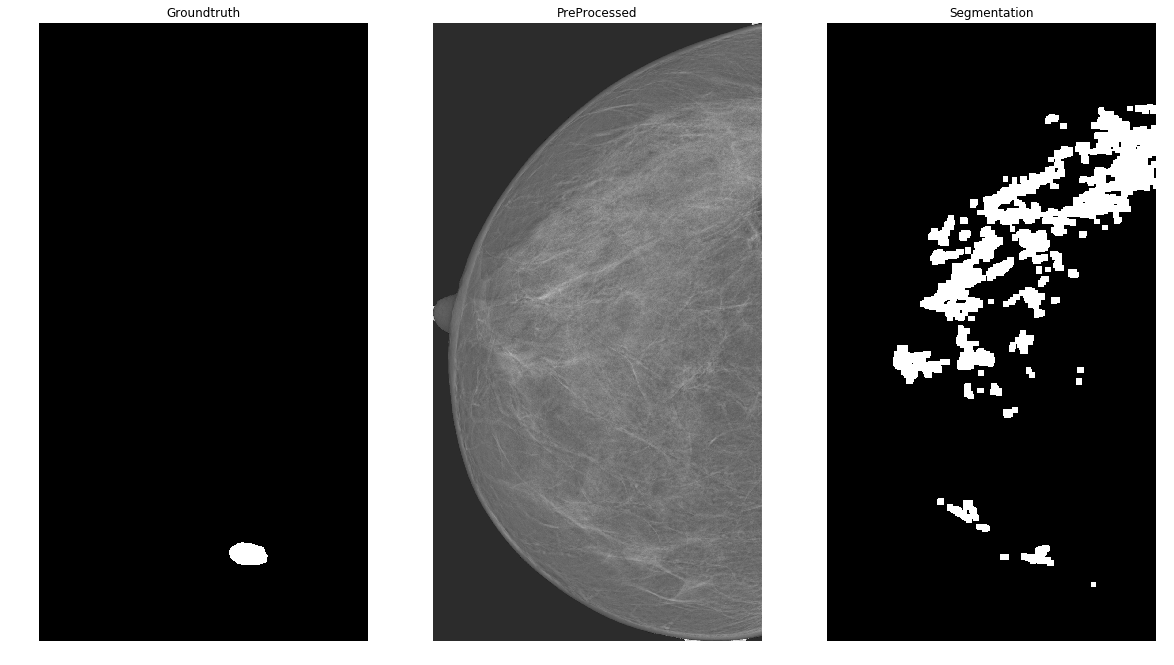

0.5537571248313972


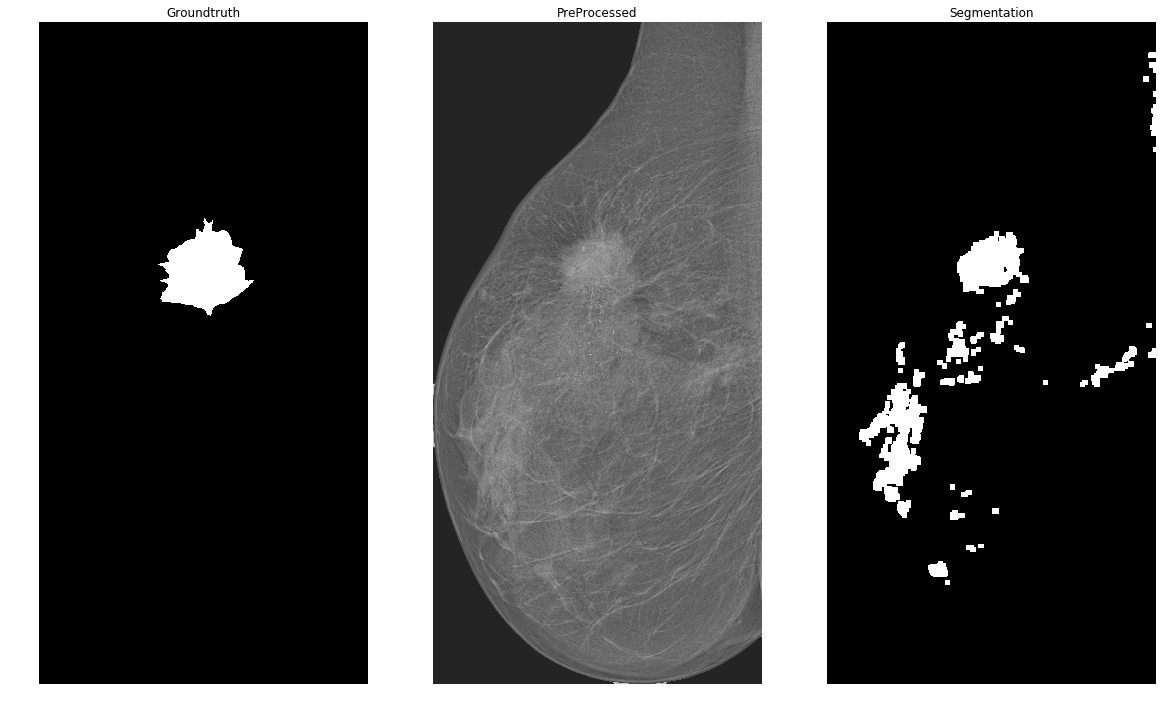

0.5901065856853638


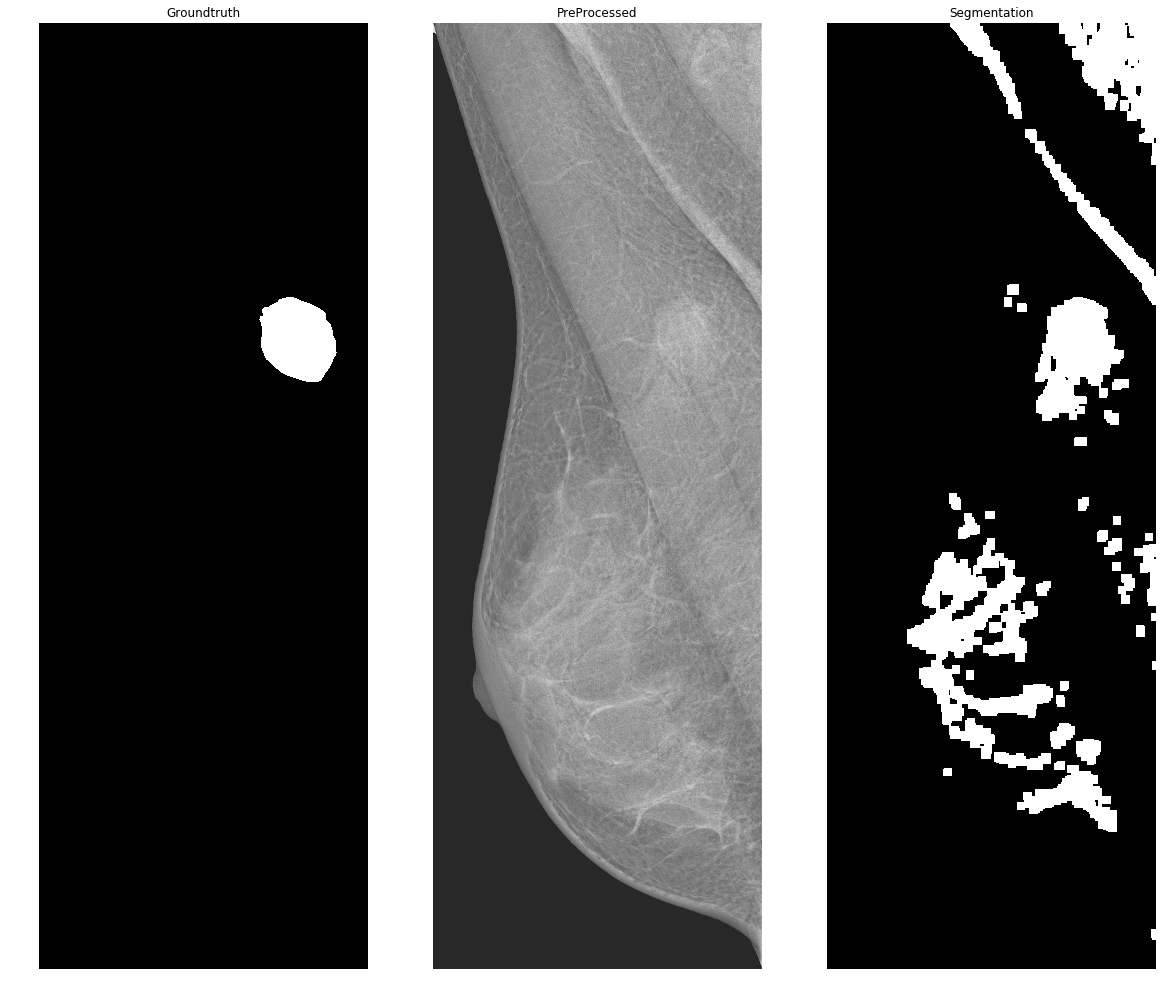

0.8253342601300241


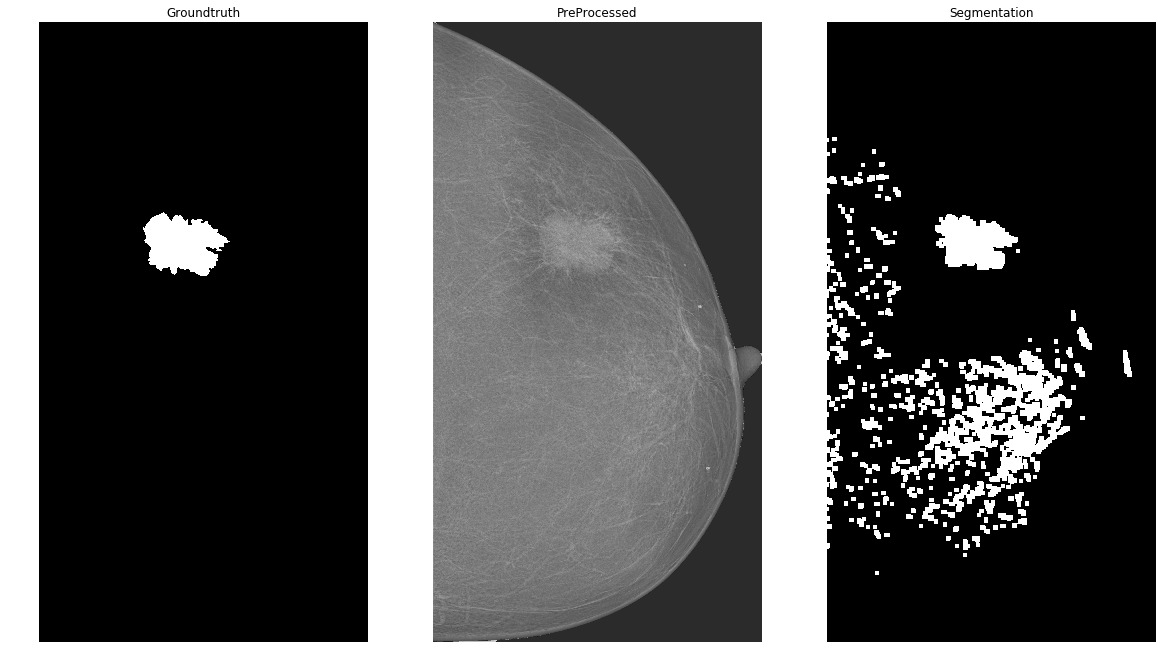

0.6067739160484387


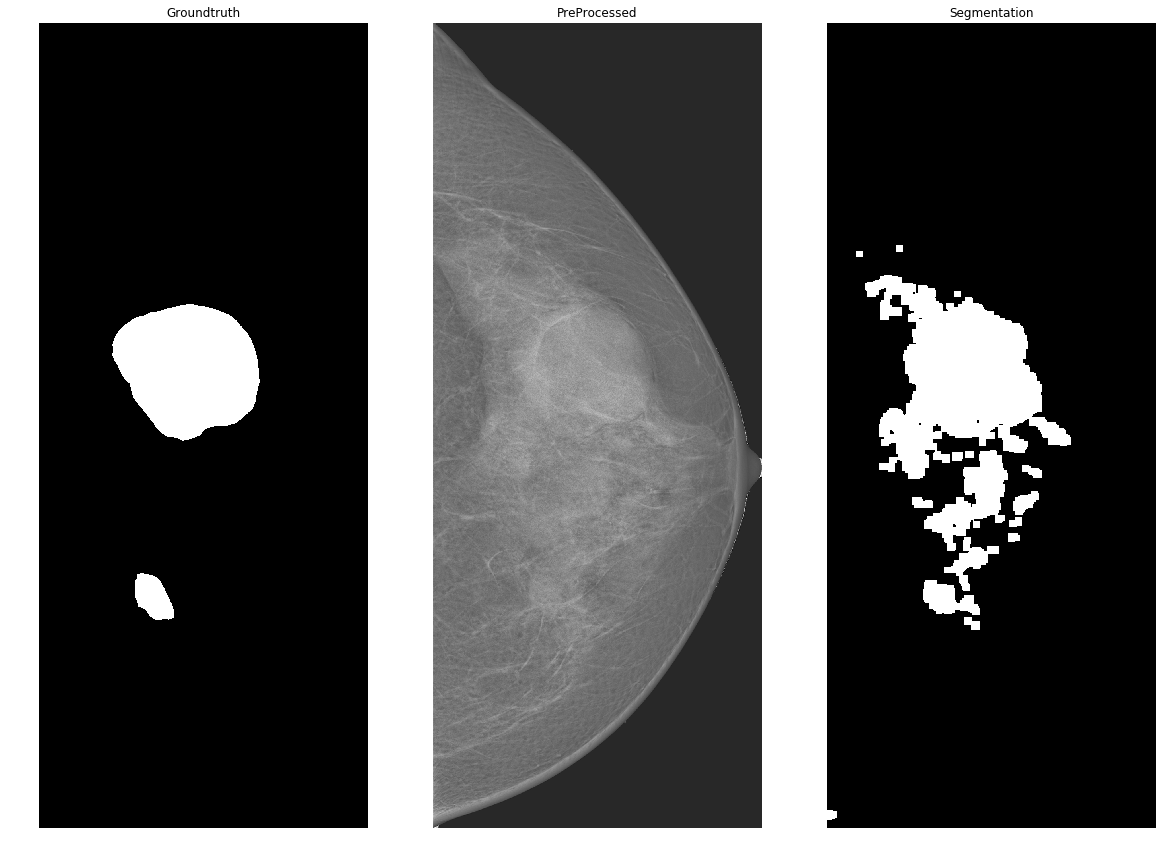

0.4477061714909885


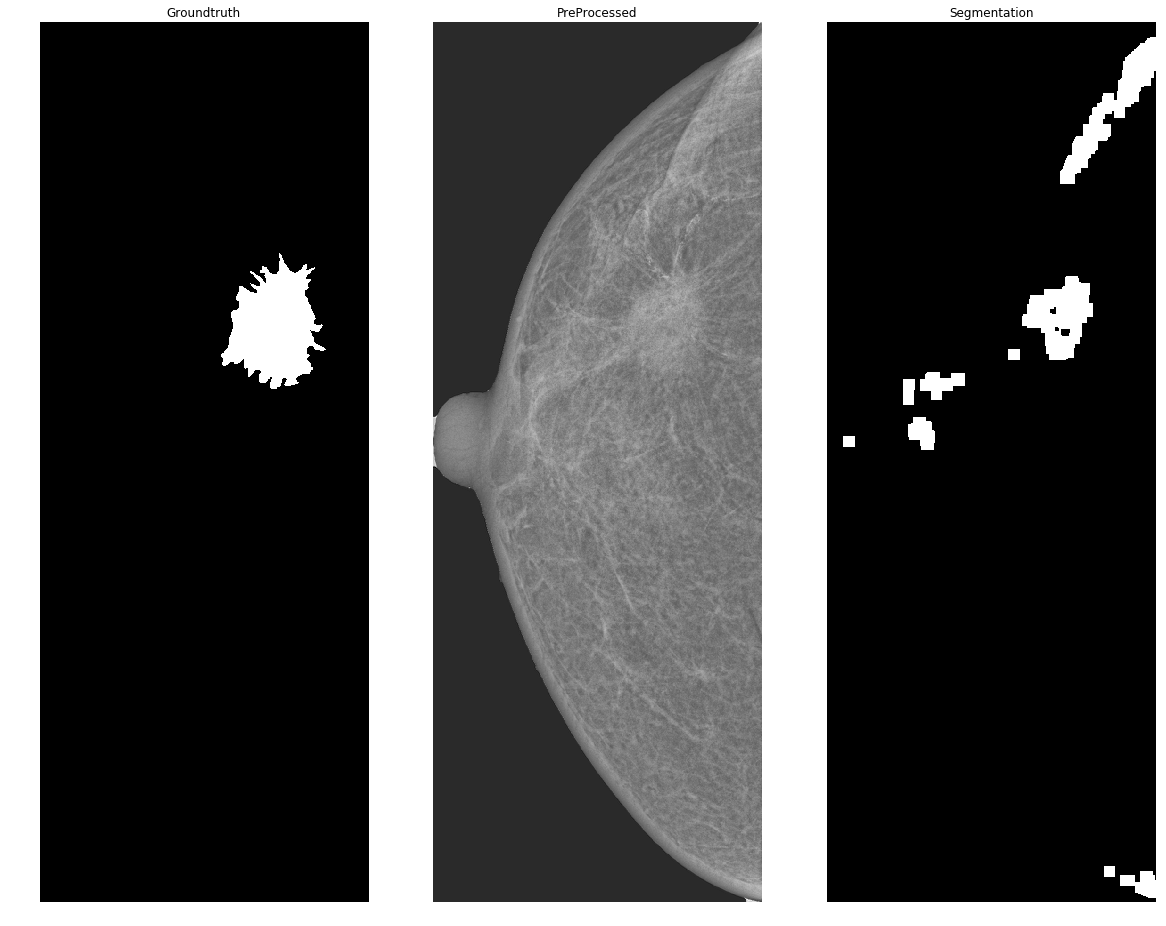

0.6359993404876091


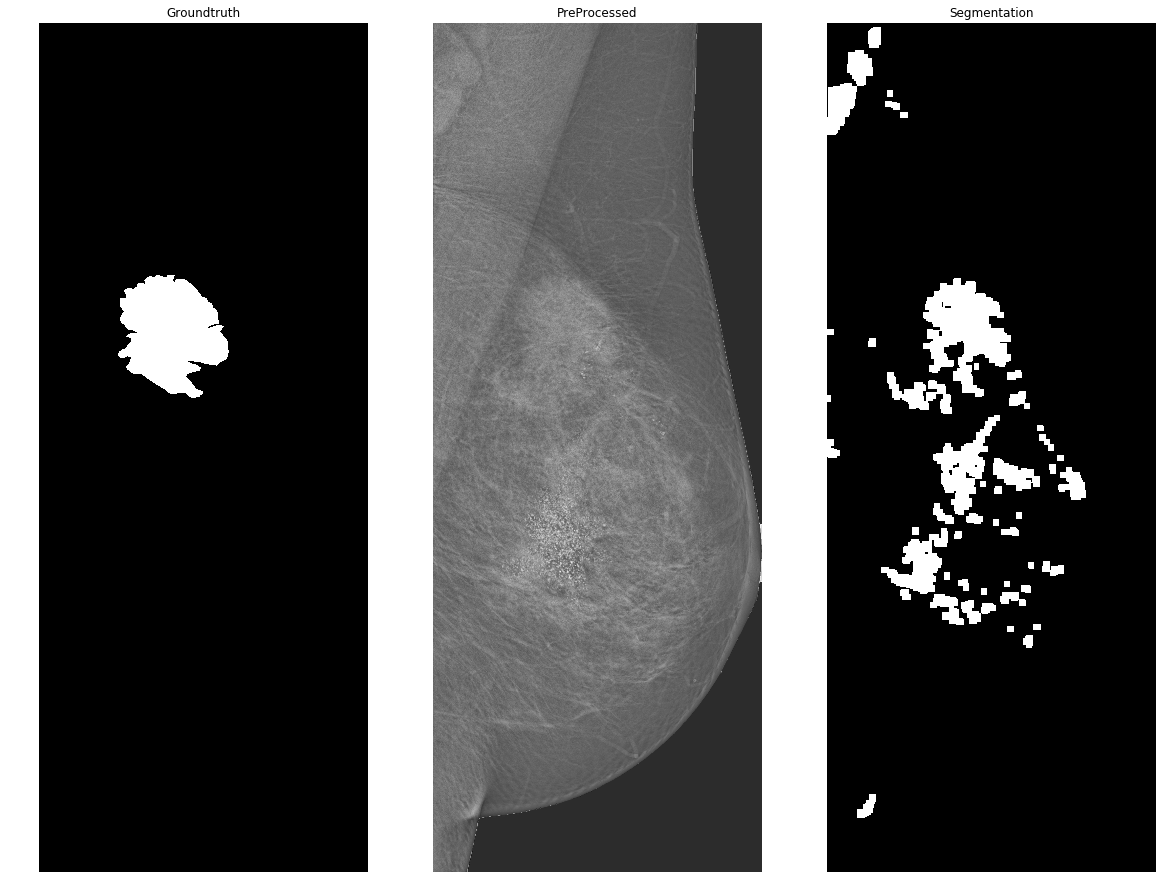

0.0876524716456238


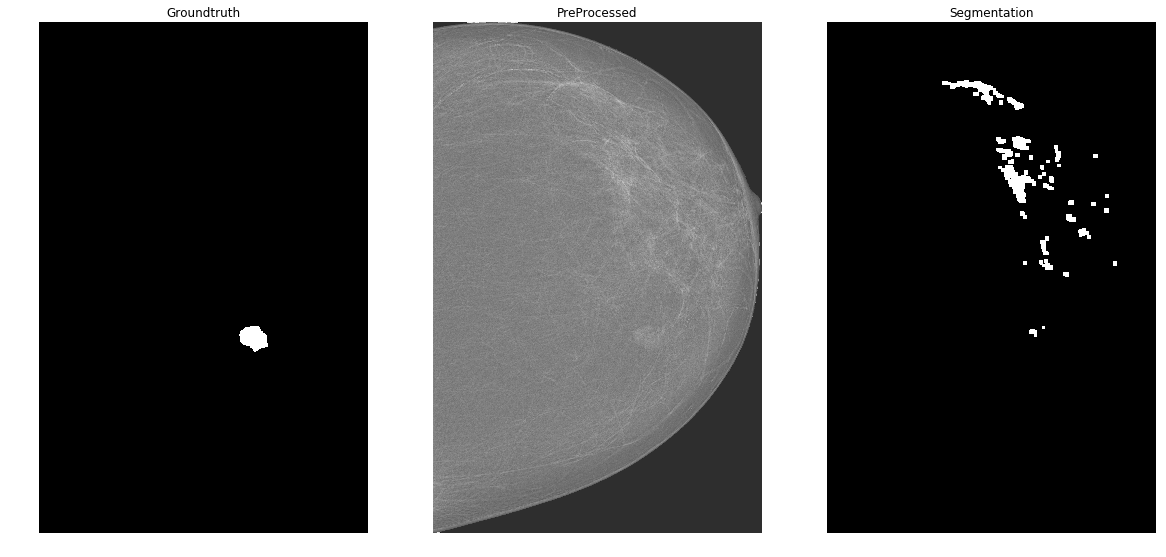

0.3711800658204043


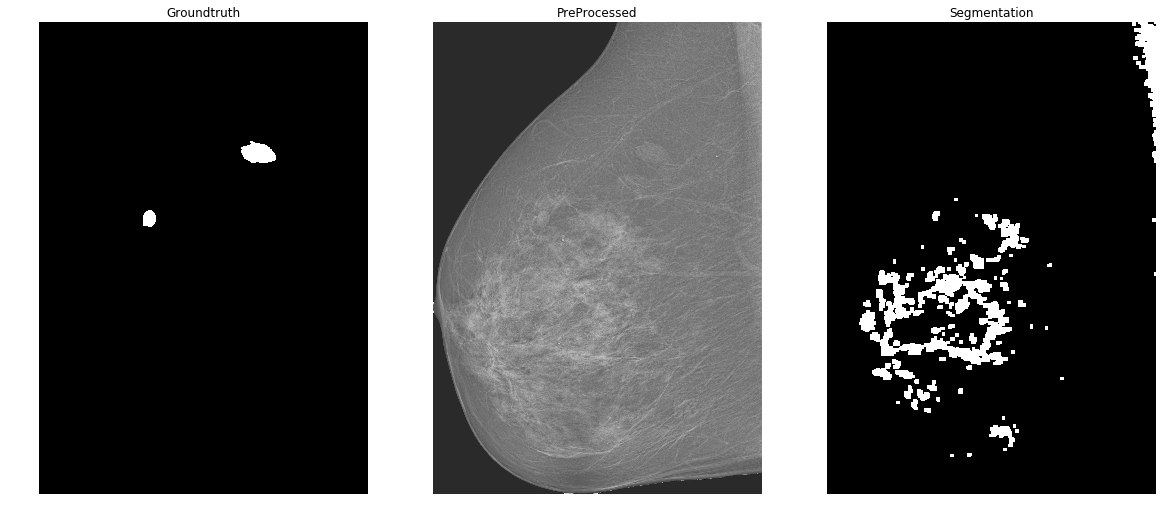

0.809845381748404


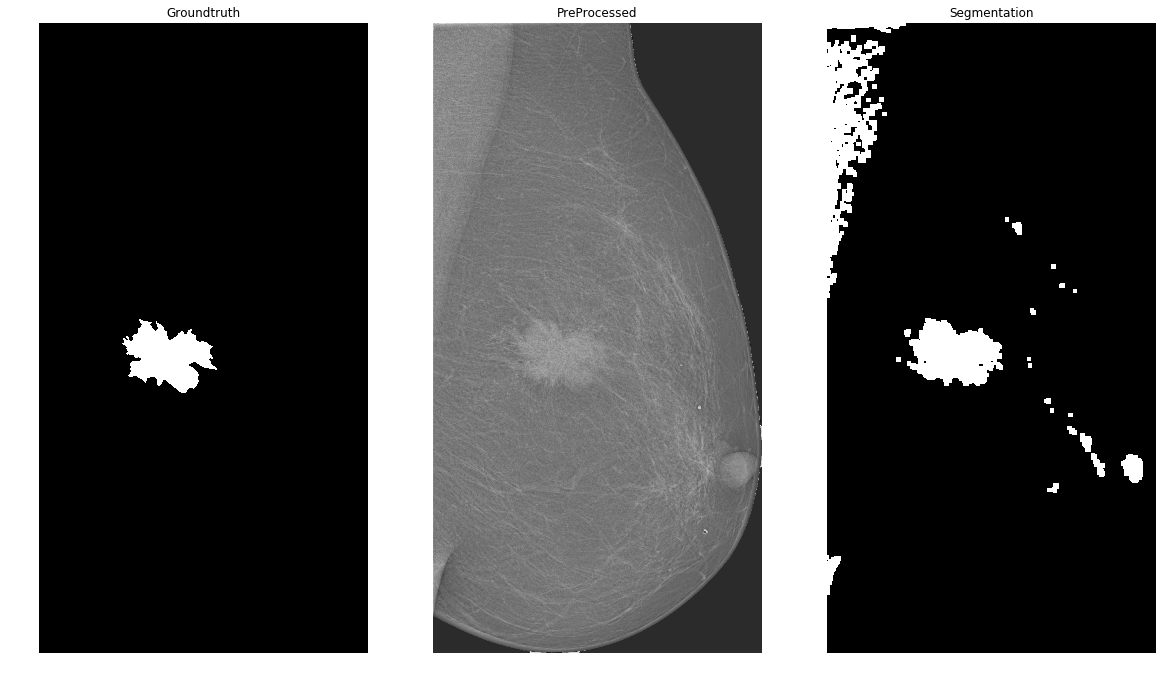

0.8049778715021019


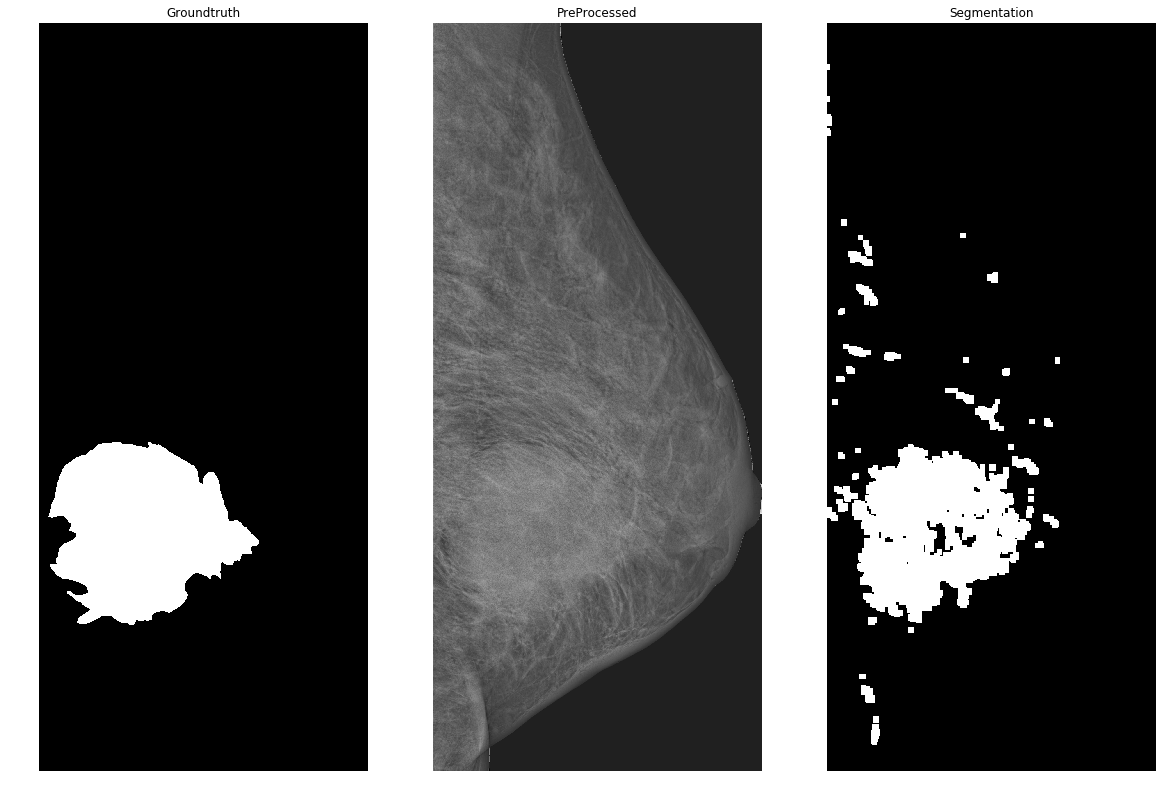

0.5600617685305592


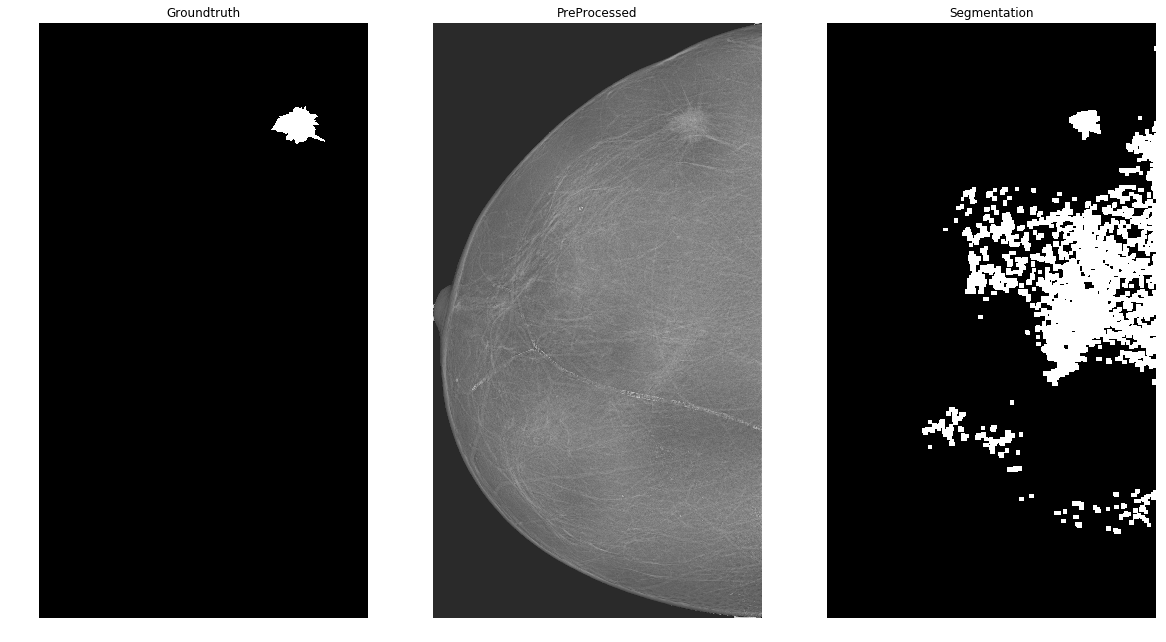

0.002802109405201987


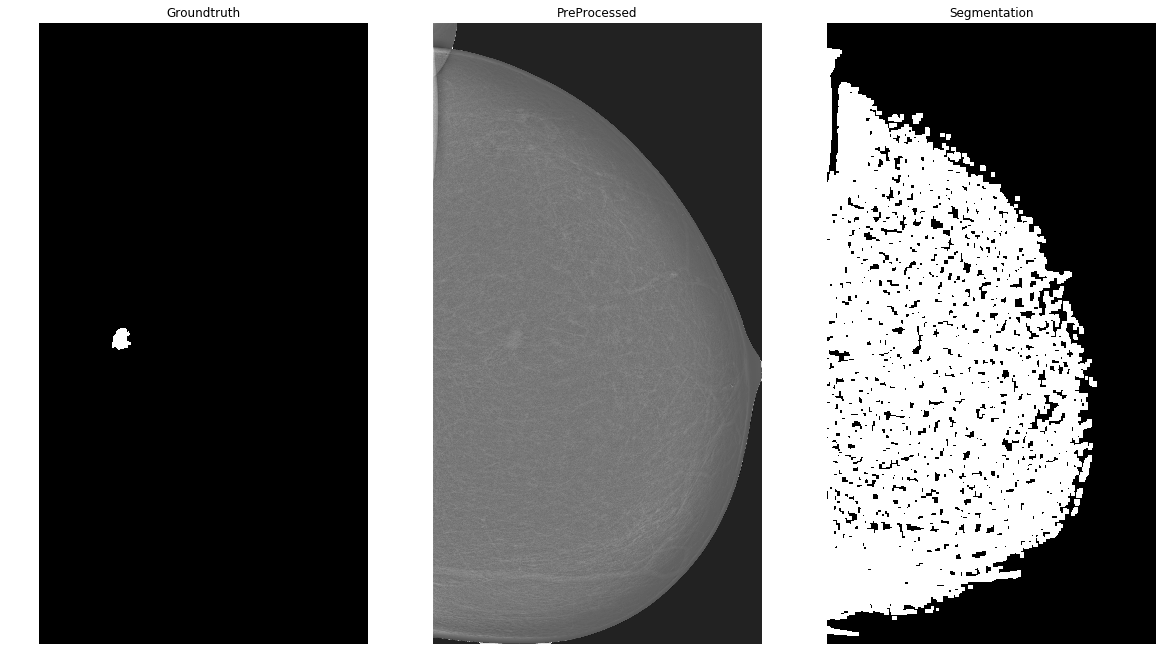

0.5213725074246924


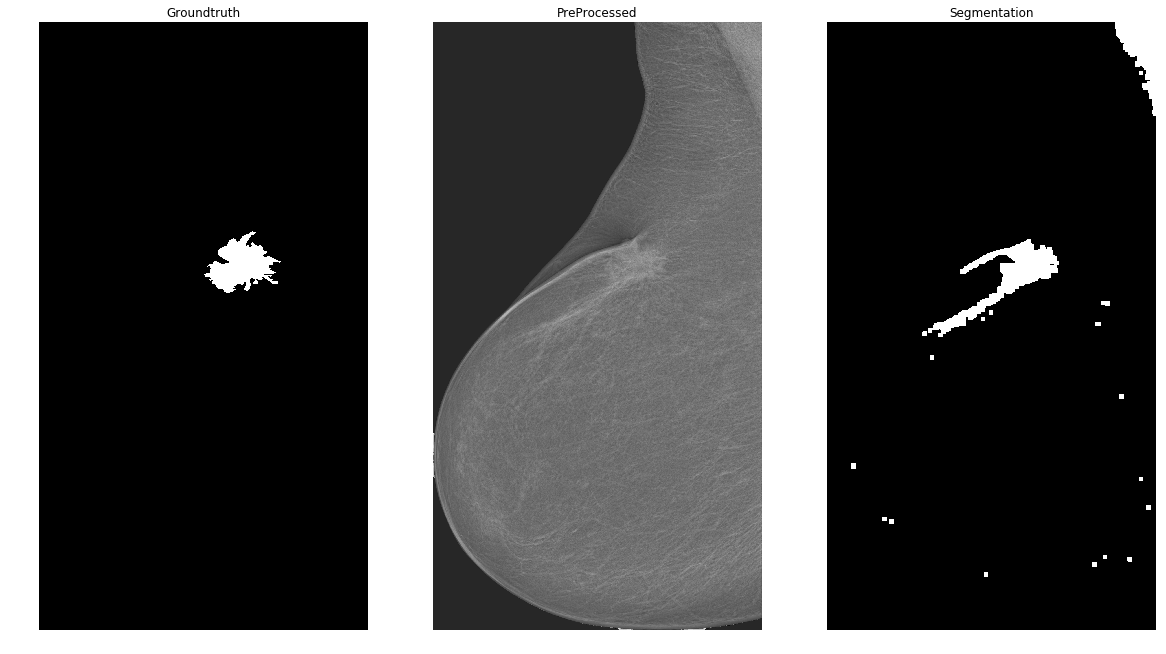

0.4094593242386845


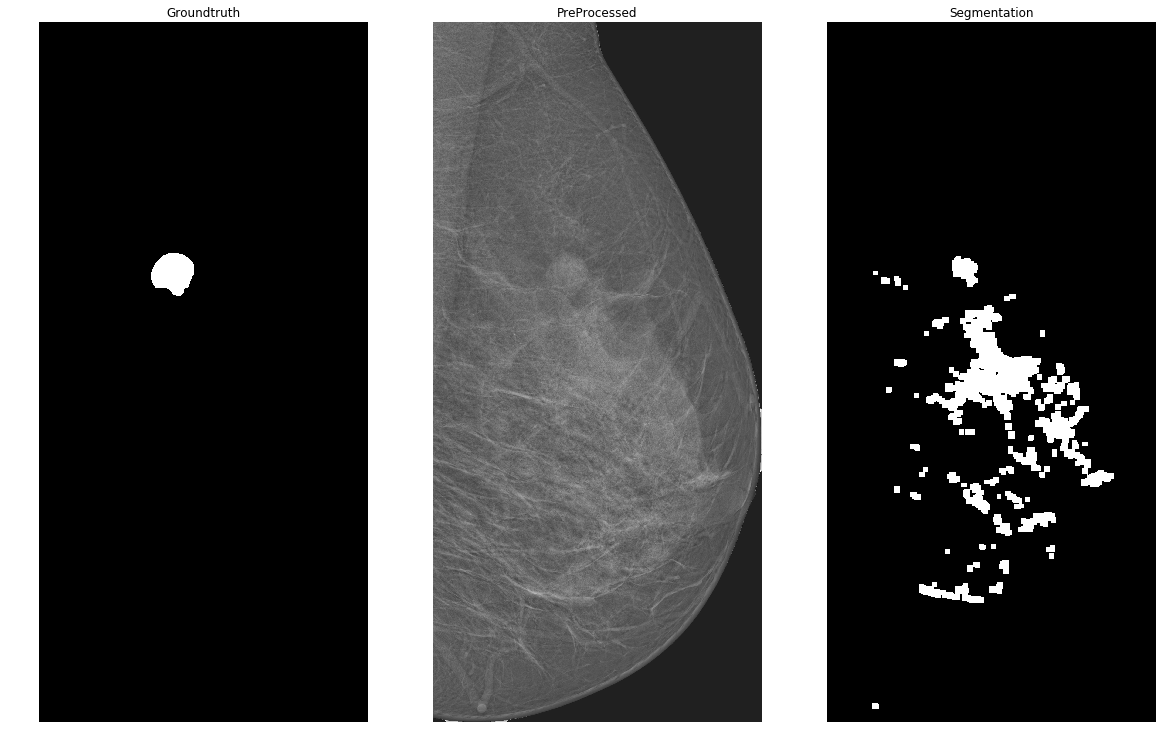

0.5968988315273163


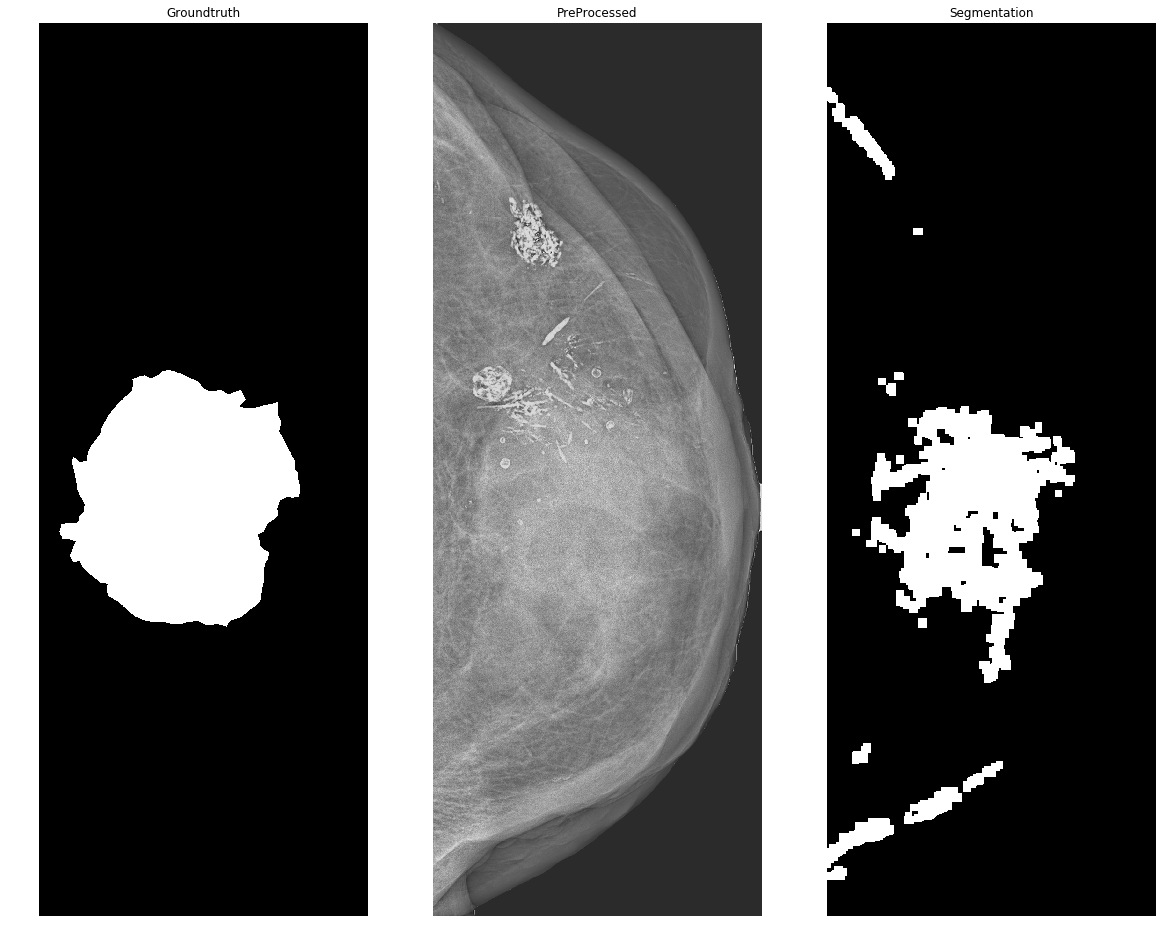

0.07169256447959306


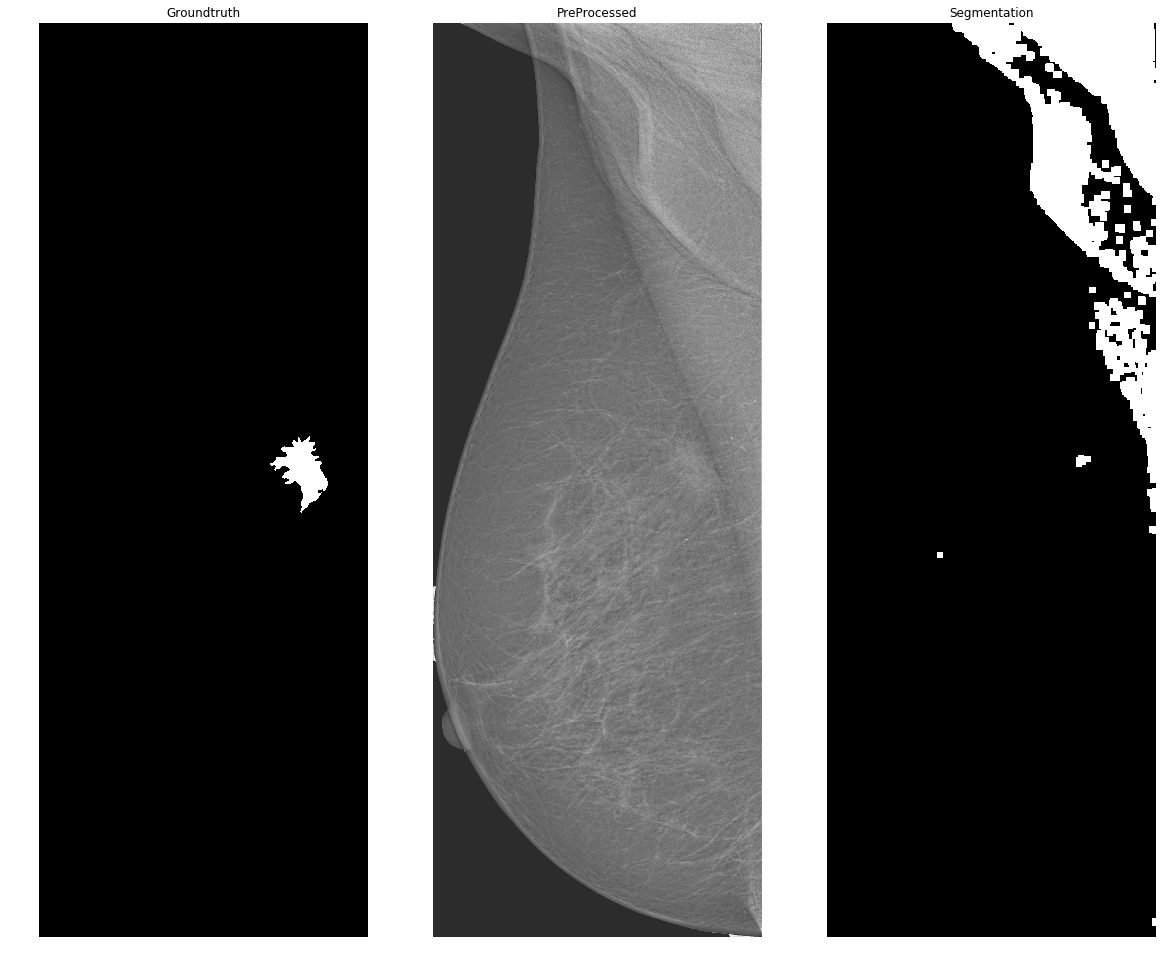

0.6527160743134087


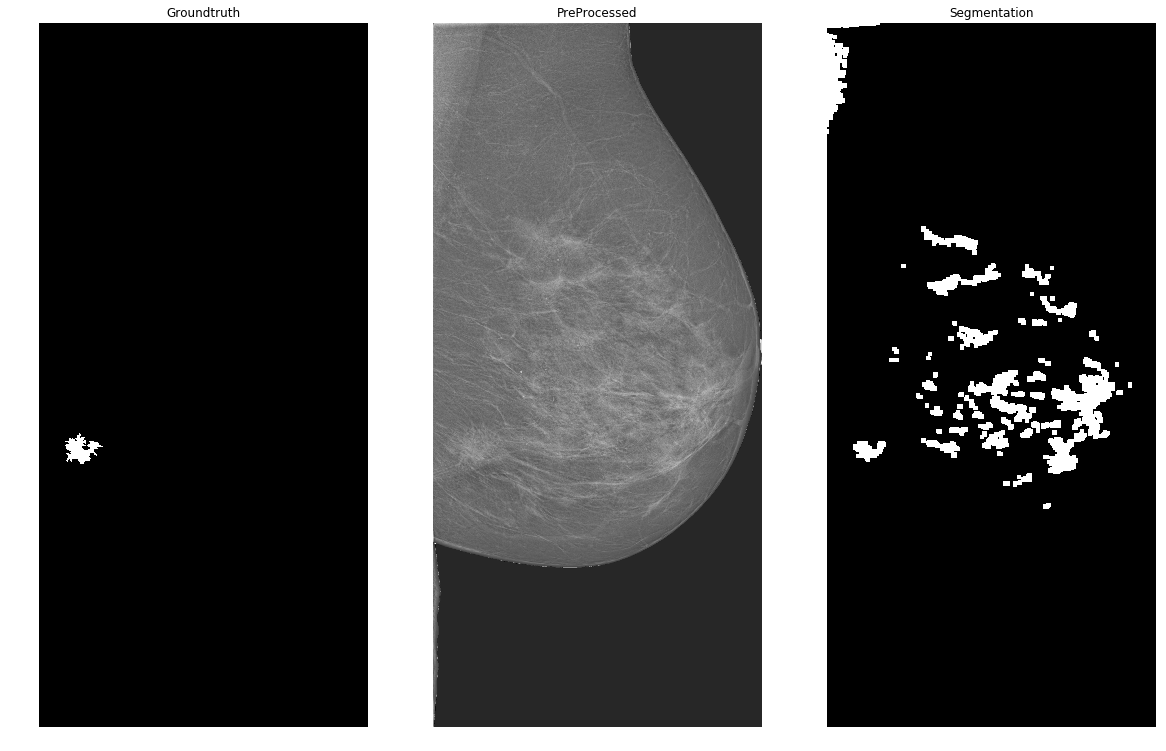

0.19102886750555145


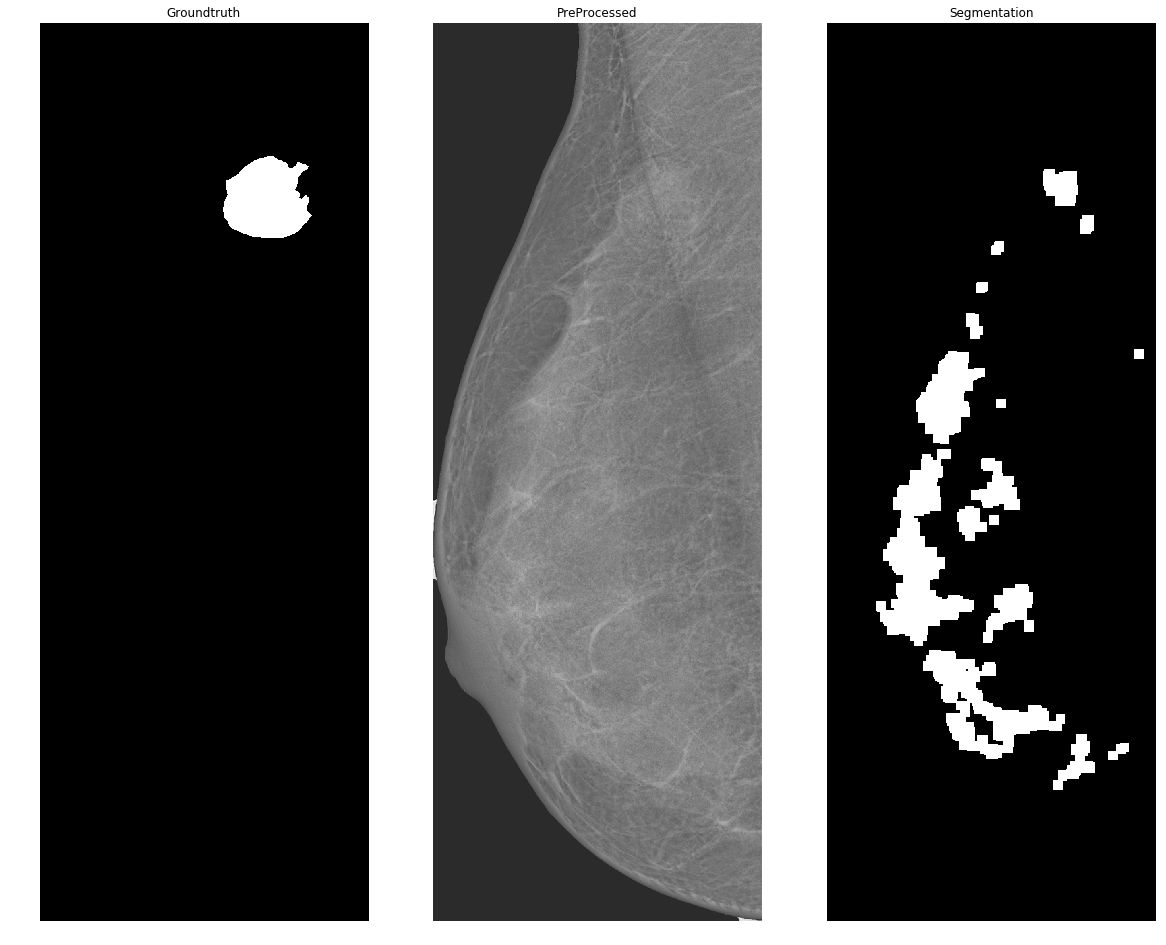

0.6700273051879857


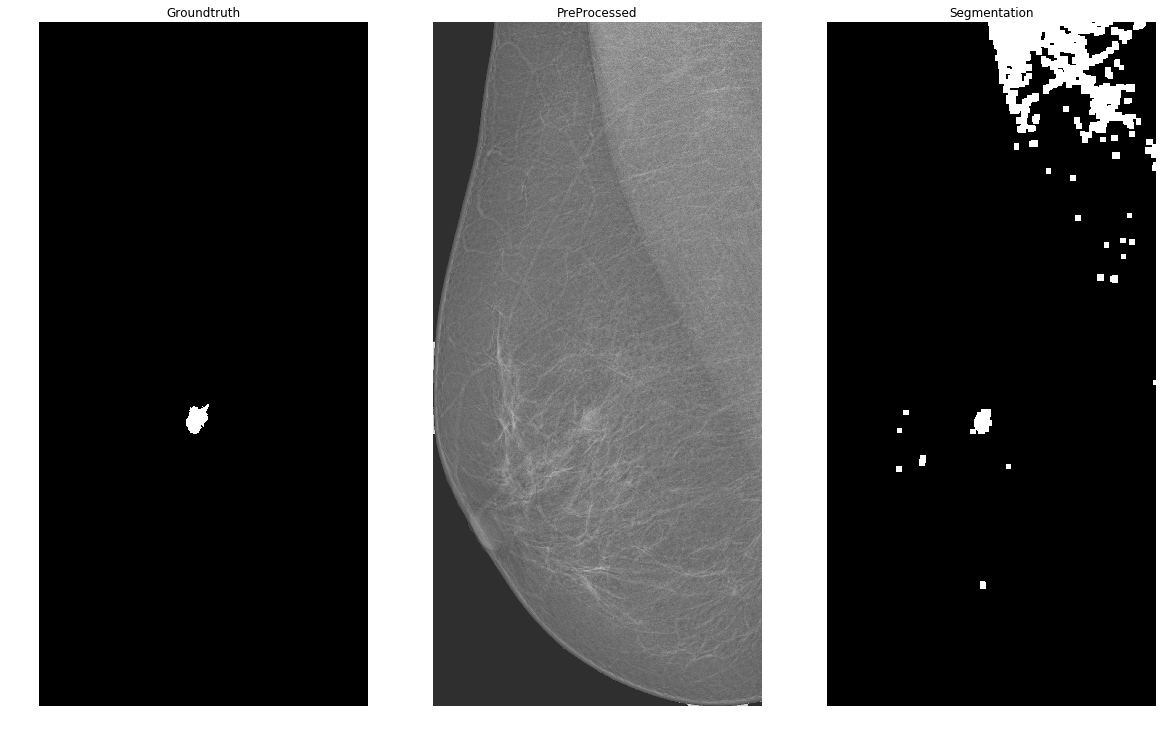

0.12077067669172932


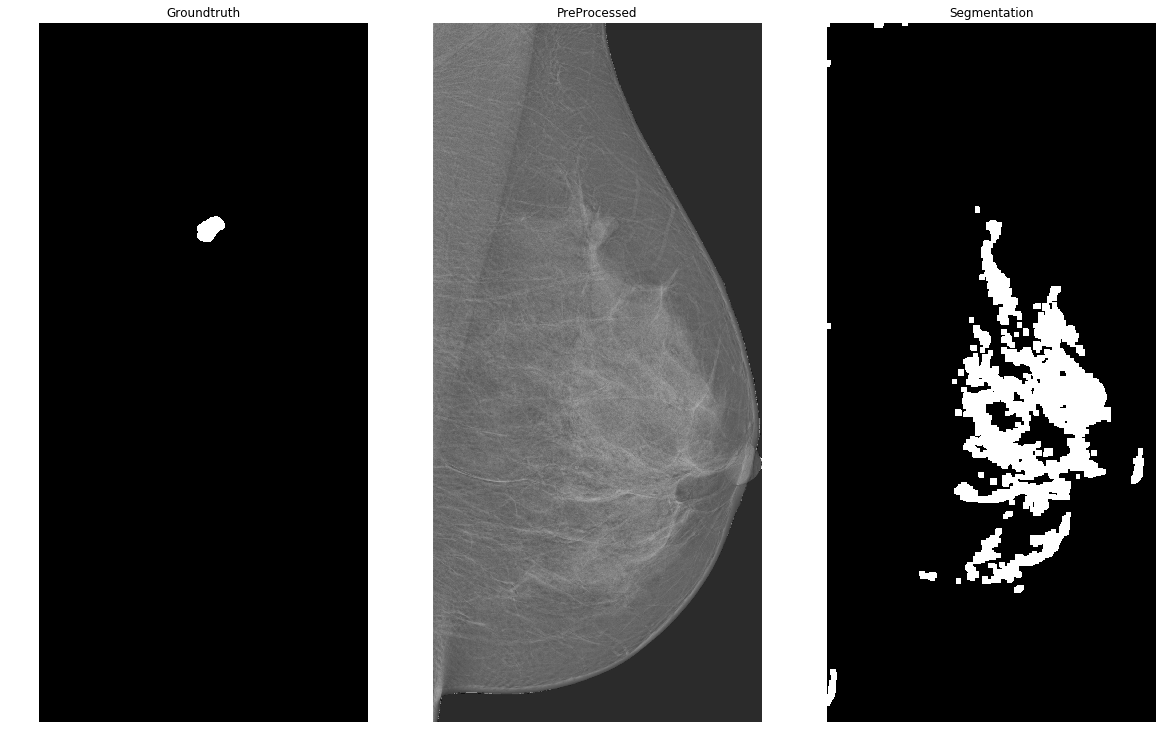

0.6203153830648287


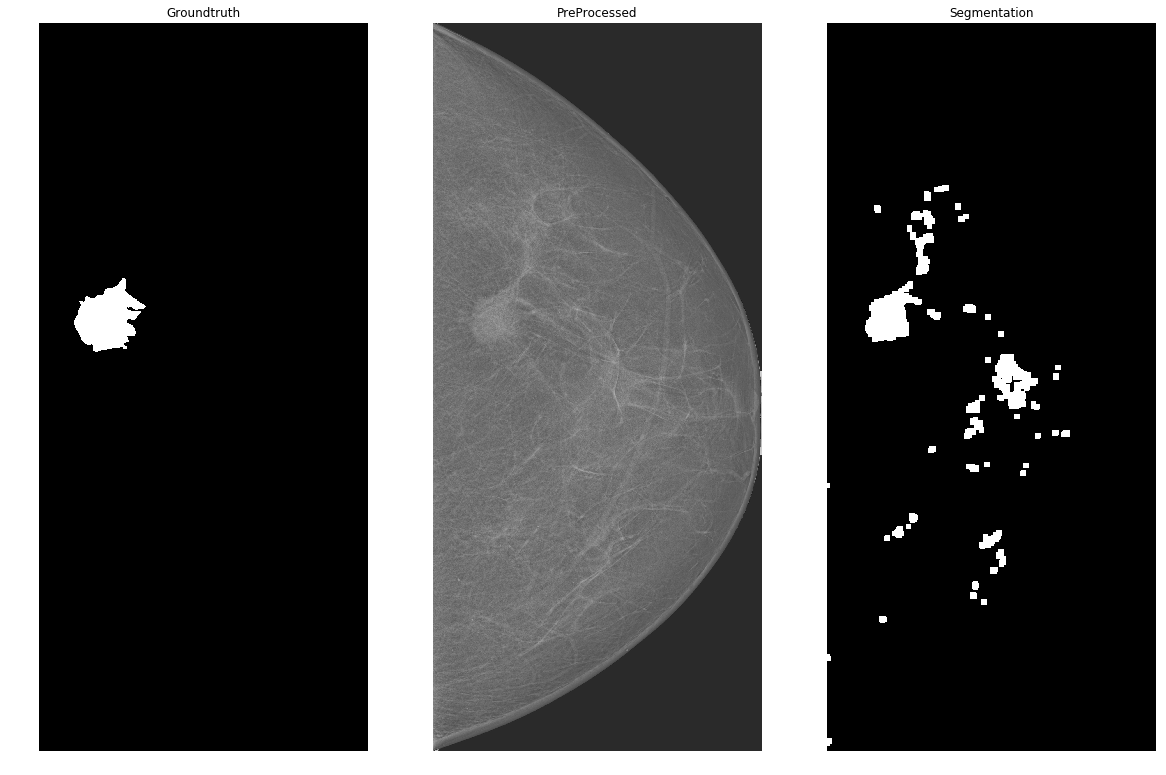

0.4225593376503718


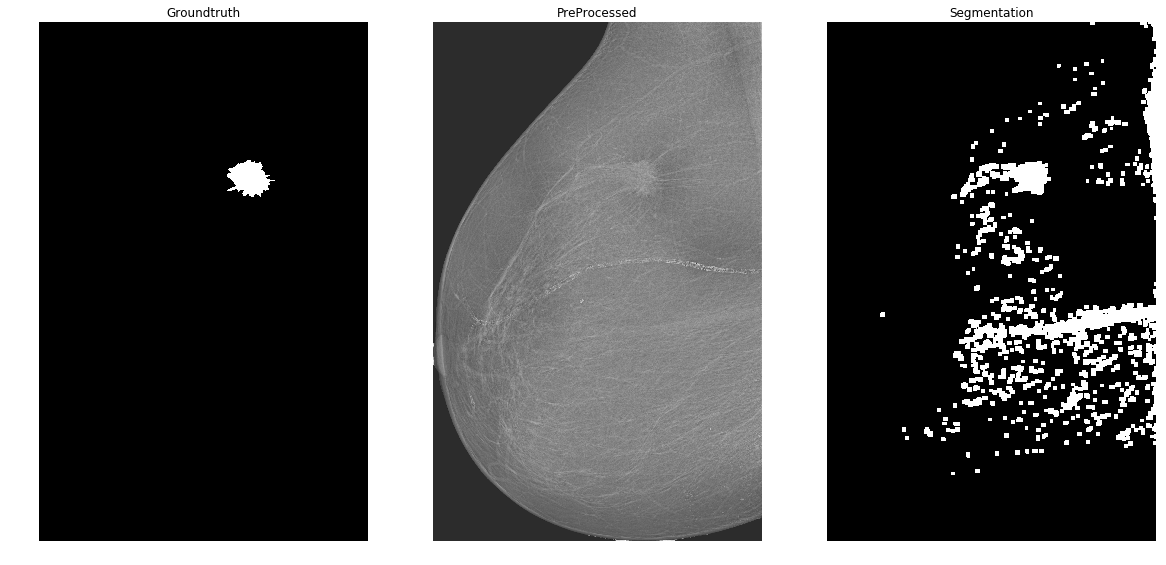

0.6720815316047801


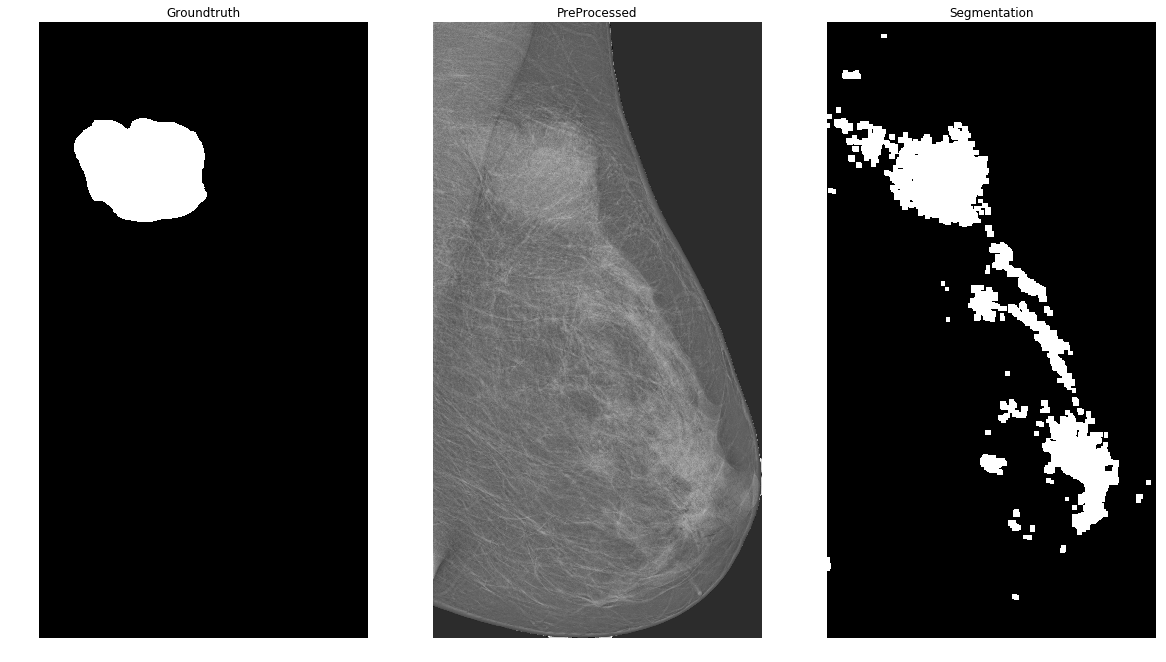

0.6486579490708878


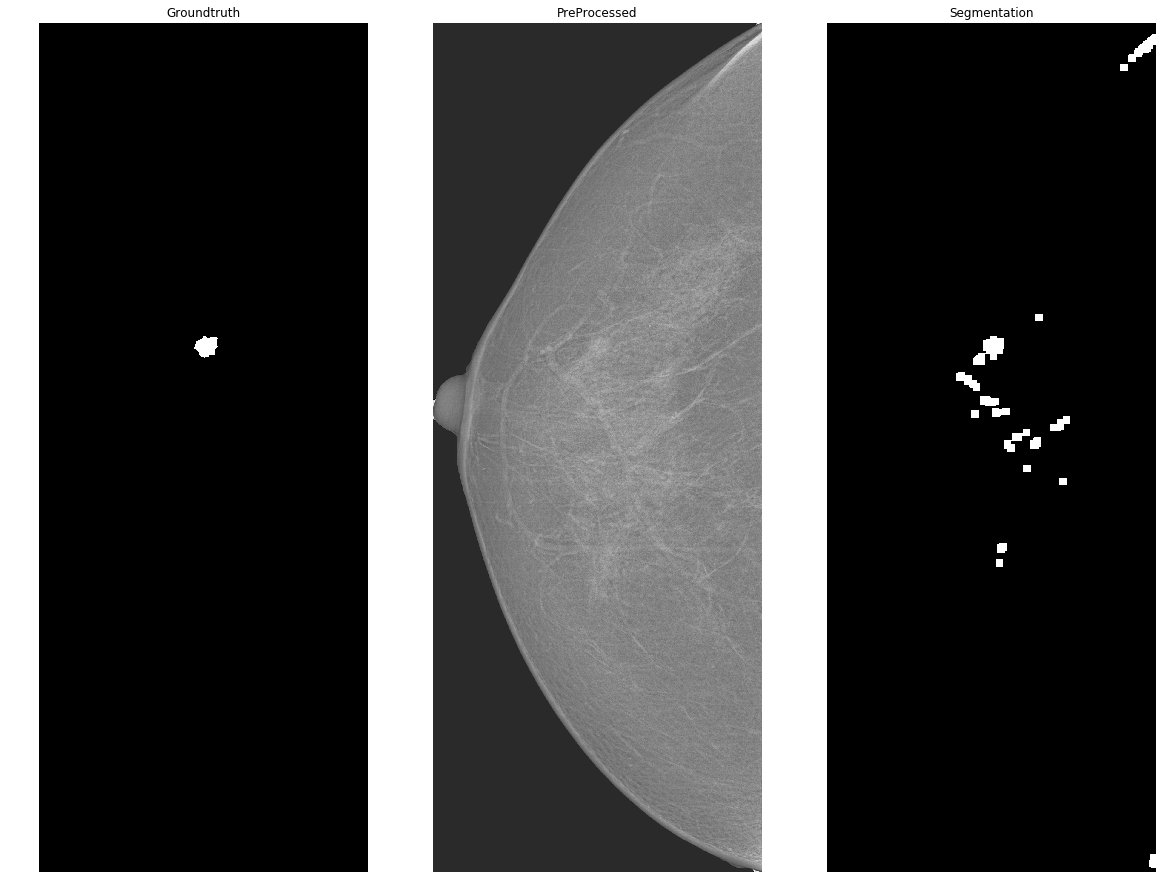

0.9110328150189817


In [ ]:
data_set = read_dataset(image_folder="../dataset/masses_examples",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            train_set_fraction=1)

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

img = data_set["train"]

index1 = Plot_Result(img, Morpho_kernel_size=20, Morpho_clahe_kernel=8.0, PreOpenKernel=(5,5), OpenKernel=(27,27), CloseKernel=(3,3))

In [6]:
print(index1)
print(index2)
print(index3)
print(index4)
print(index5)
print(index6)
print(index7)
print(index8)
print(index9)
print(index10)

(0.6138290180043008, 0.6122604550084865)
(0.6117997004660064, 0.6102873066249939)
(0.6068746560205063, 0.5850686044699586)
(0.6127786668510814, 0.6094253085780941)
(0.6127786668510814, 0.6021518921480171)
(0.5876657913939495, 0.591317245457768)
(0.5466331422418894, 0.5482597357768121)
(0.6038522595534439, 0.6014176007382527)
(0.6005801778606853, 0.5977633584186183)
(0.6128143418423113, 0.6127870432968789)


Jaccard Index to Verify Results

In [ ]:
print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

av_jaccard = 0
img = data_set["train"]
count = 0
for m in img:
    m.read_data()
    m.image_data = testPreProcessing(m.image_data,20,10.0)
    #Best parameters should be made default ... for segmentations
    Seg, SegA, SegB = Segmentation(m.image_data, Openkernel=(20,20), Openkernel1=(23,23), OpenKernel2=(20,20), Kernel3=(5,10))
    av_jaccard = av_jaccard + segmentation.jaccard_index(SegB,  m.cropped_ground_truth)
    count = count + 1
    print(segmentation.jaccard_index(SegB,  m.cropped_ground_truth))

print("Average jaccard index for training set (Segmentaion1)is {}".format(av_jaccard/count))
#print("Average jaccard index for training set (Segmentaion2)is {}".format(av_jaccard2/count))

In [ ]:
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.png"
pectoral_muscle = "../dataset/pectoral_muscle_masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"
mm = MammogramImage(path_image, path_mask, pmuscle_mask_path=pectoral_muscle)


img = mm.image_data


enhanced = preprocessing.clahe(img)
morpho = preprocessing.morphoEnhancement(img)
img_wavelet = preprocessing.waveletTransform(morpho)

plt.figure(figsize=(20, 10))
plt.subplot(1,4,1)
plt.axis("off")
plt.imshow(img, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Image')

plt.subplot(1,4,2)
plt.axis("off")
plt.imshow(enhanced, interpolation="nearest", cmap=plt.cm.gray)
plt.title('CLAHE')

plt.subplot(1,4,3)
plt.axis("off")
plt.imshow(morpho, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Morpho')

plt.subplot(1,4,4)
plt.axis("off")
plt.imshow(img_wavelet, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Wavelet and Morpho')
plt.show()